# Import Libraries

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Load and Exploration of Dataset

Dataset Shape: (45211, 17)

First 5 rows:
    age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Column Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452

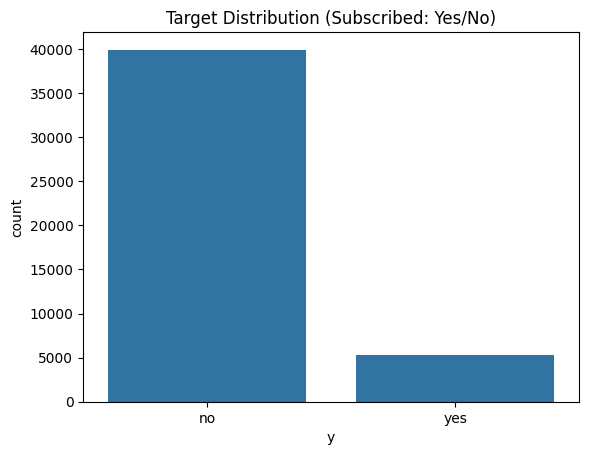

In [16]:
df = pd.read_csv("bank-full.csv", sep=';')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nColumn Info:\n")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget value counts:\n", df['y'].value_counts())
sns.countplot(x="y", data=df)
plt.title("Target Distribution (Subscribed: Yes/No)")
plt.show()


Statistical Summary:
                  age          job  marital  education default        balance  \
count   45211.000000        45211    45211      45211   45211   45211.000000   
unique           NaN           12        3          4       2            NaN   
top              NaN  blue-collar  married  secondary      no            NaN   
freq             NaN         9732    27214      23202   44396            NaN   
mean       40.936210          NaN      NaN        NaN     NaN    1362.272058   
std        10.618762          NaN      NaN        NaN     NaN    3044.765829   
min        18.000000          NaN      NaN        NaN     NaN   -8019.000000   
25%        33.000000          NaN      NaN        NaN     NaN      72.000000   
50%        39.000000          NaN      NaN        NaN     NaN     448.000000   
75%        48.000000          NaN      NaN        NaN     NaN    1428.000000   
max        95.000000          NaN      NaN        NaN     NaN  102127.000000   

       housing  

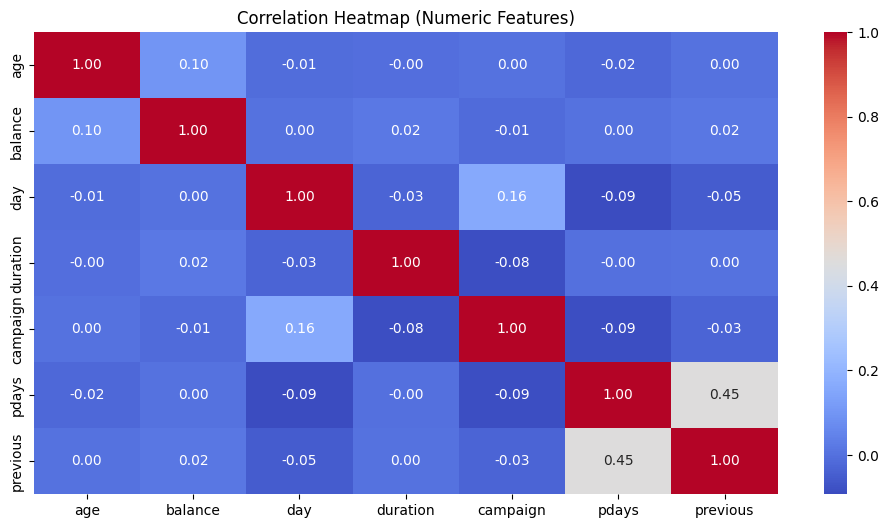

In [15]:
print("\nStatistical Summary:\n", df.describe(include='all'))
print("\nUnique Values per Column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

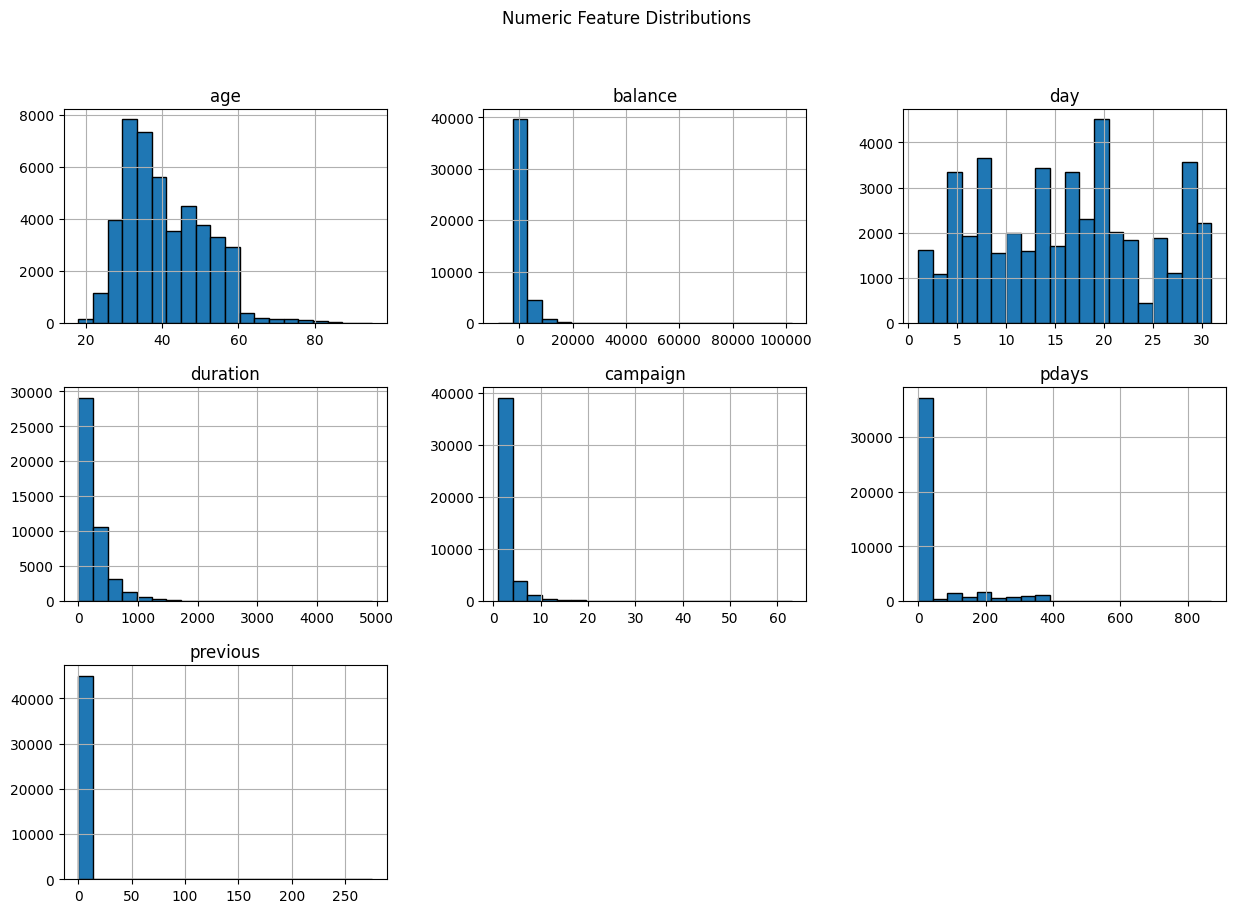

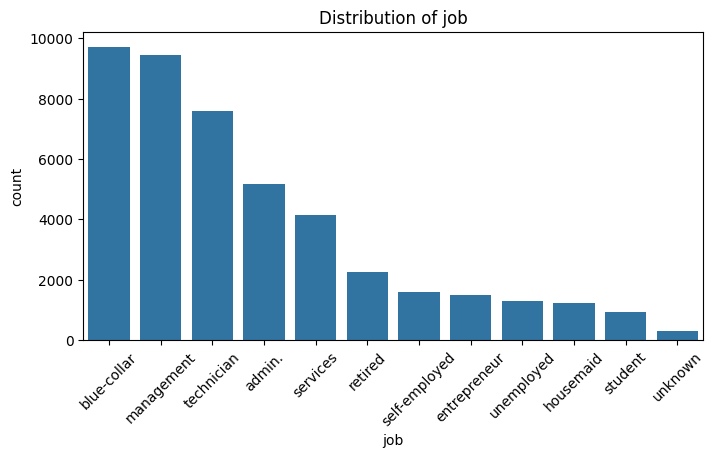

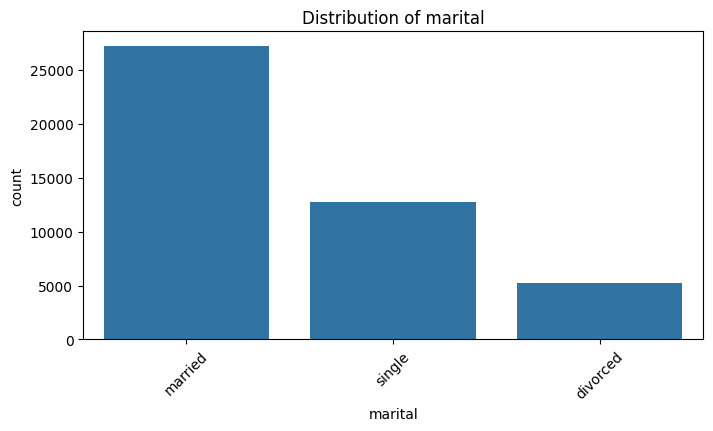

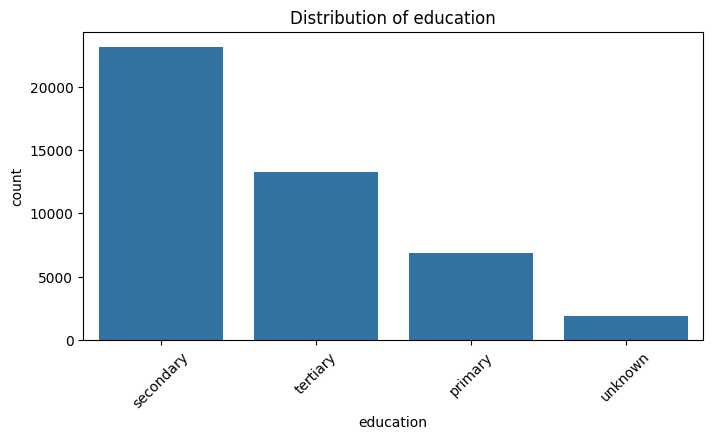

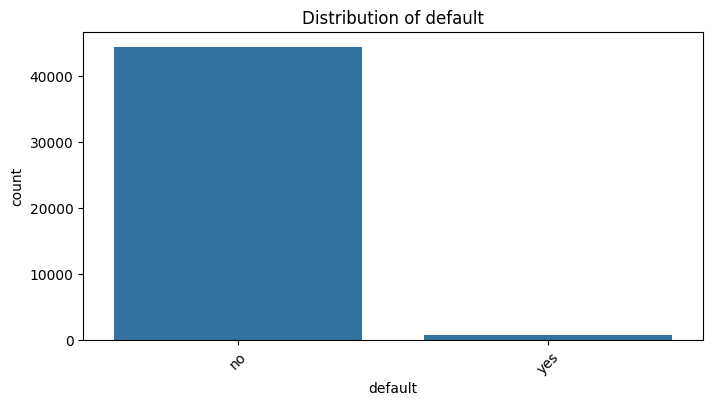

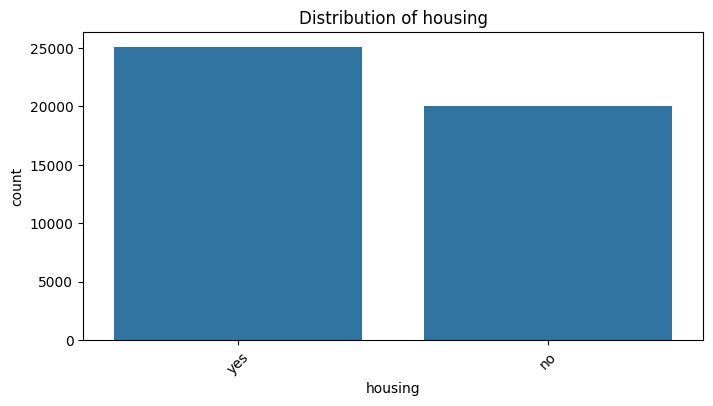

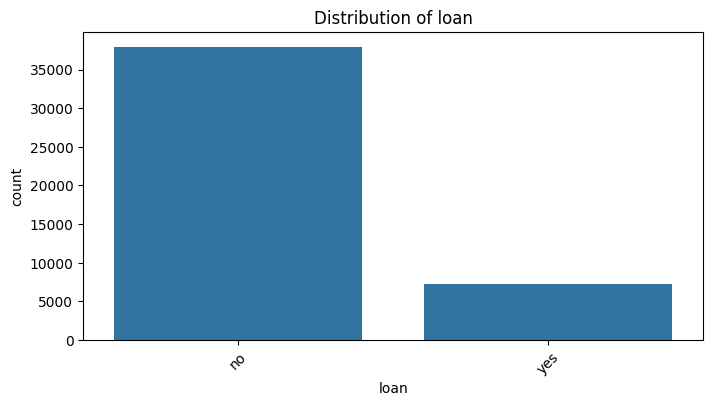

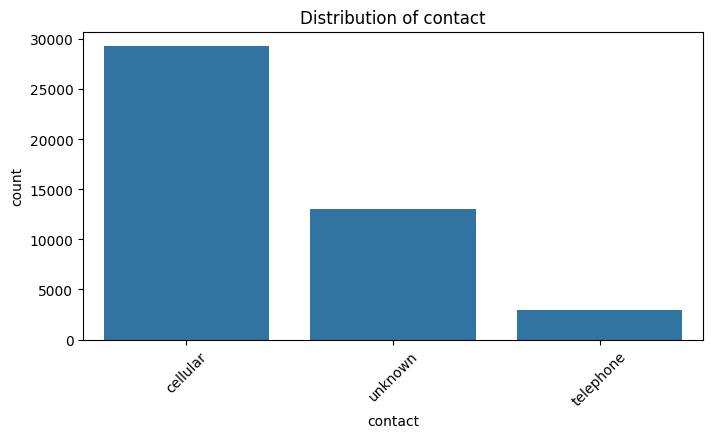

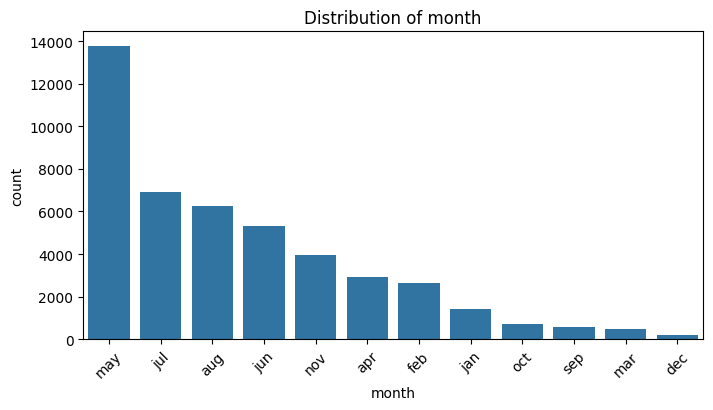

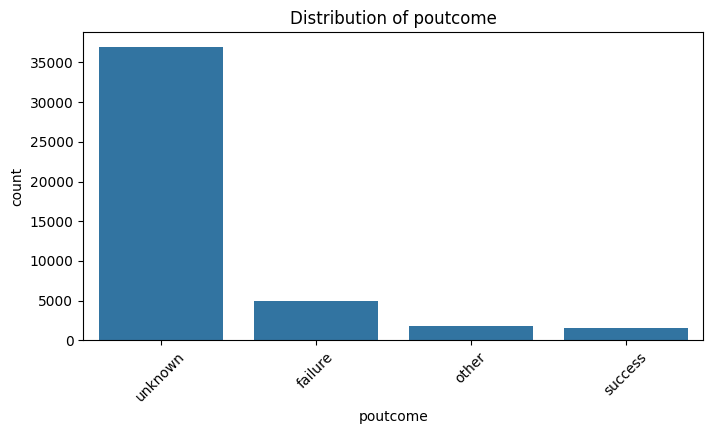

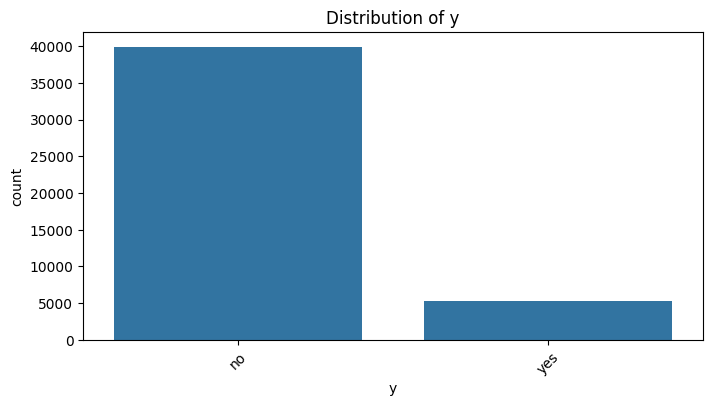

In [14]:
df.select_dtypes(include=np.number).hist(bins=20, figsize=(15, 10), edgecolor="black")
plt.suptitle("Numeric Feature Distributions")
plt.show()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

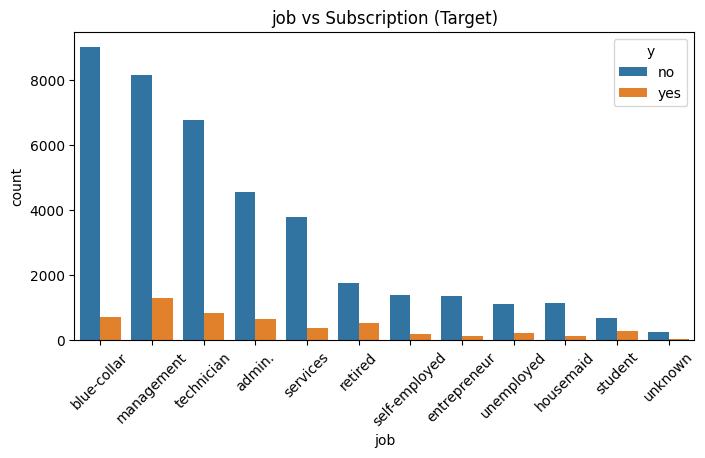

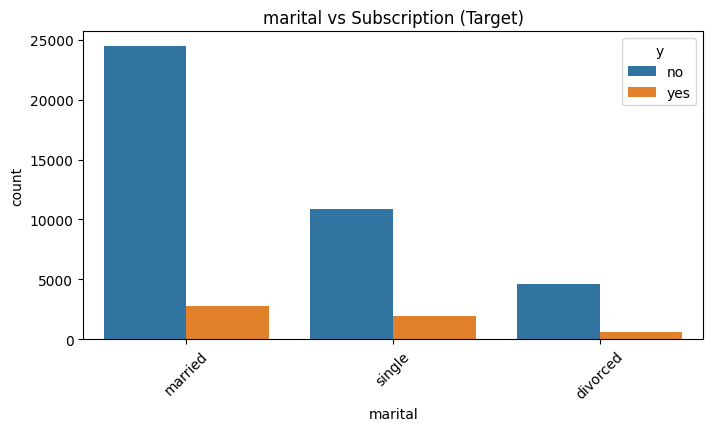

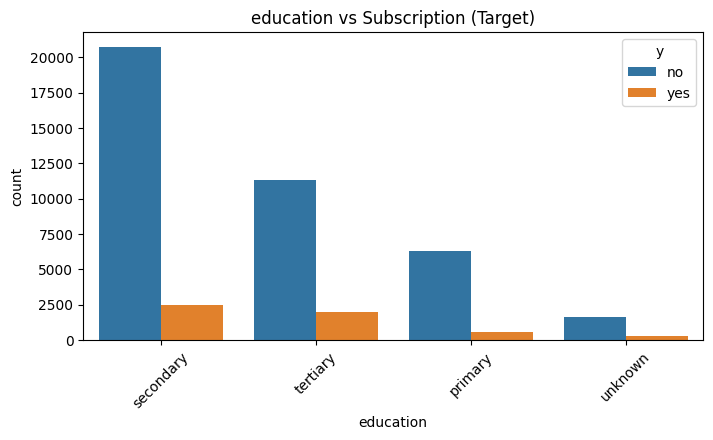

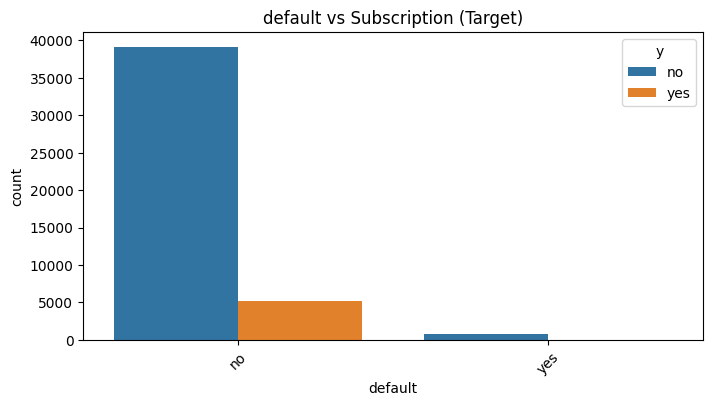

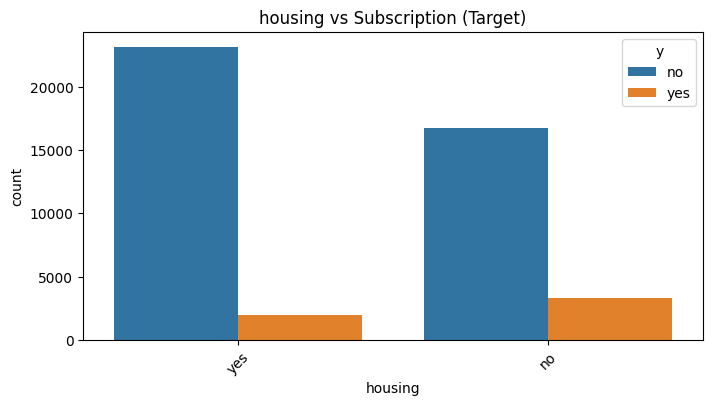

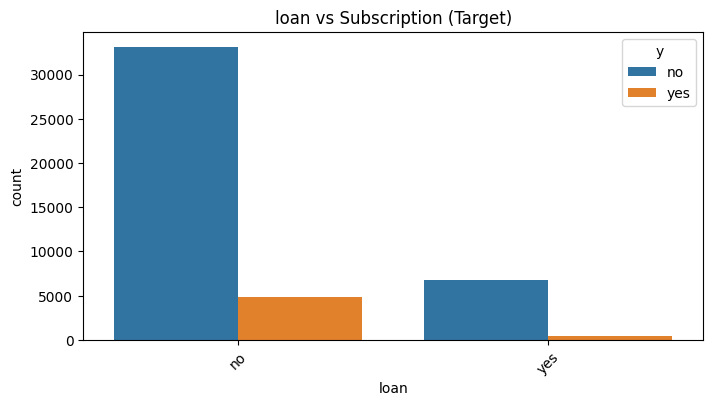

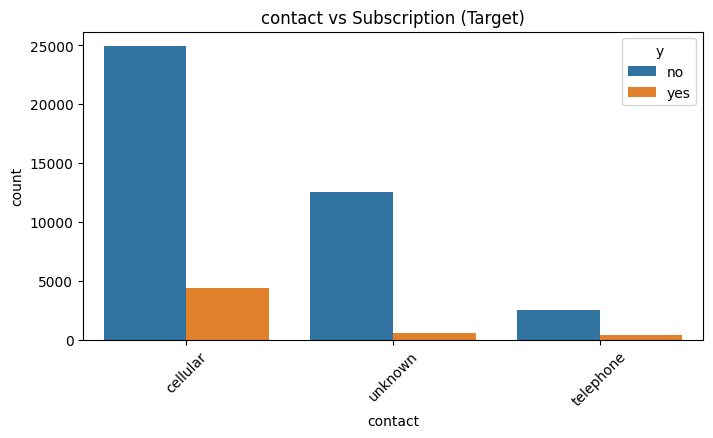

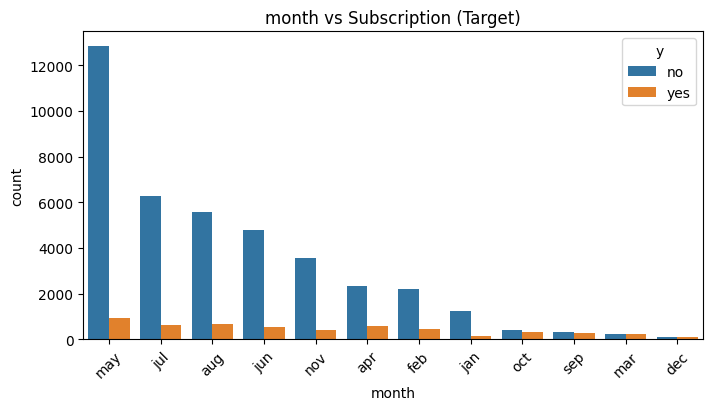

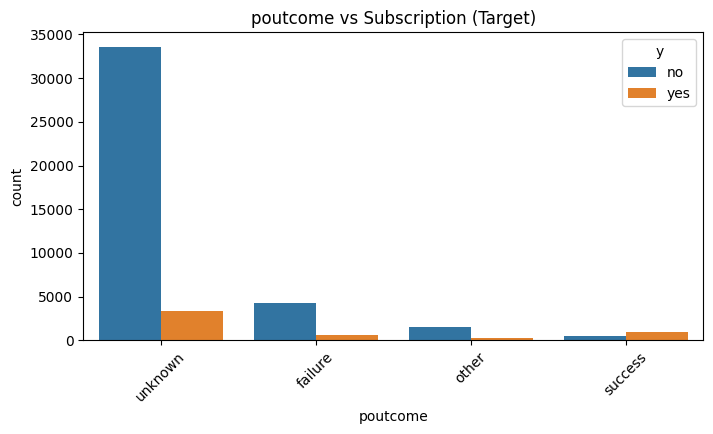

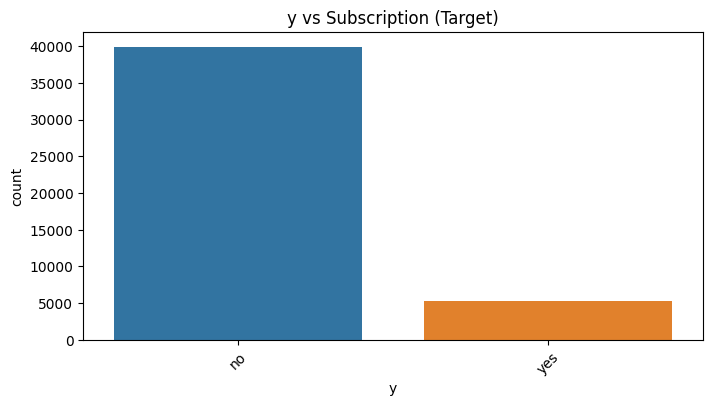


Target Variable Distribution (with percentages):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


In [13]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue="y", order=df[col].value_counts().index)
    plt.title(f"{col} vs Subscription (Target)")
    plt.xticks(rotation=45)
    plt.show()
print("\nTarget Variable Distribution (with percentages):")
print(df['y'].value_counts(normalize=True) * 100)

# Encoding and Training of Logistic Model

In [3]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
log_reg = LogisticRegression(max_iter=500, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

# Model Evaluation






Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.60      0.21      0.31      1587

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.87      0.89      0.87     13564



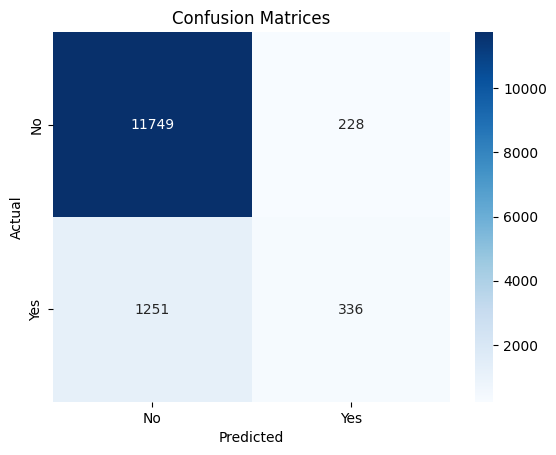

In [18]:
y_pred = log_reg.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrices")
plt.show()
